In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [4]:
train.shape


(3235, 6)

In [5]:
test.shape

(1387, 5)

In [6]:
train.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [7]:
train.sentiment_class.unique()

array([ 0, -1,  1], dtype=int64)

In [8]:
train.sentiment_class.value_counts()

 0    1701
-1     769
 1     765
Name: sentiment_class, dtype: int64

In [9]:
positive  = train.loc[train["sentiment_class"] == 1];

neutral= train.loc[train["sentiment_class"] == 0];

negative=train.loc[train["sentiment_class"]== -1];




D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  bi

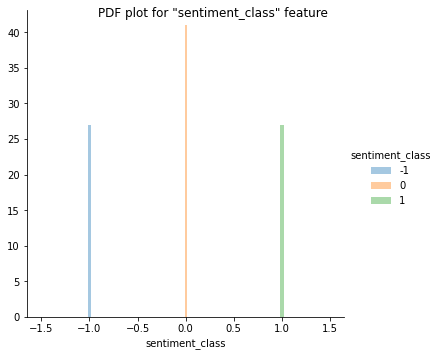

In [10]:
sns.FacetGrid(train, hue="sentiment_class", size=5) \
   .map(sns.distplot, "sentiment_class") \
   .add_legend().fig.suptitle('PDF plot for "sentiment_class" feature');
plt.show();

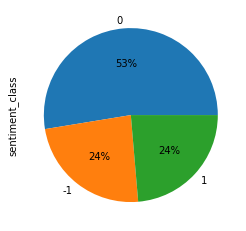

In [11]:
train.sentiment_class.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [12]:
train.head()


,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [13]:
train=train.drop(['id','lang','retweet_count','original_author'],axis=1)

In [14]:
train.head()

,original_text,sentiment_class
0,Happy #MothersDay to all you amazing mothers o...,0
1,Happy Mothers Day Mum - I'm sorry I can't be t...,0
2,Happy mothers day To all This doing a mothers ...,-1
3,Happy mothers day to this beautiful woman...ro...,0
4,Remembering the 3 most amazing ladies who made...,-1


In [15]:
test=test.drop(['id','lang','retweet_count','original_author'],axis=1)

In [16]:
test.head()

,original_text
0,"3. Yeah, I once cooked potatoes when I was 3 y..."
1,"Happy Mother's Day to all the mums, step-mums,..."
2,"I love the people from the UK, however, when I..."
3,Happy 81st Birthday Happy Mother’s Day to my m...
4,Happy Mothers day to all those wonderful mothe...


In [17]:
d=train.append(test)
print(d)

                                          original_text  sentiment_class
0     Happy #MothersDay to all you amazing mothers o...              0.0
1     Happy Mothers Day Mum - I'm sorry I can't be t...              0.0
2     Happy mothers day To all This doing a mothers ...             -1.0
3     Happy mothers day to this beautiful woman...ro...              0.0
4     Remembering the 3 most amazing ladies who made...             -1.0
...                                                 ...              ...
1382  Happy Mother’s Day you crazy bitch I’m sorry c...              NaN
1383  Mum can't get to the bingo, so we brought the ...              NaN
1384  Despite all this bullshit today has been one o...              NaN
1385  Happy Mothers Day Firstly to my Queen daniele_...              NaN
1386  Mothers Day Walk When you live in a tiny villa...              NaN

[4622 rows x 2 columns]


D:\Anaconda\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [33]:
features=train.iloc[:,0].values
features1=test.iloc[:,0].values


In [34]:
import re
processed_features = []

for sentence in range(0, len(features)):
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    processed_feature = processed_feature.lower()
    processed_features.append(processed_feature)

In [35]:
processed_features1 = []

for sentence in range(0, len(features1)):
    processed_feature1 = re.sub(r'\W', ' ', str(features1[sentence]))
    processed_feature1= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature1)
    processed_feature1 = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature1) 
    processed_feature1 = re.sub(r'\s+', ' ', processed_feature1, flags=re.I)
    processed_feature1 = re.sub(r'^b\s+', '', processed_feature1)
    processed_feature1 = processed_feature1.lower()
    processed_features1.append(processed_feature1)

In [20]:
print(processed_features)

['happy mothersday to all you amazing mothers out there know it hard not being able to see your mothers today but it on all of us to do what we can to protect the most vulnerable members of our society beatcoronavirus pic twitter com va4nfjfq5b', 'happy mothers day mum m sorry can be there to bring you mothers day flowers cwtch honestly at this point d walk on hot coals to be able to but ll be there with bells on as soon as can be love you lots xxx s we need more photos https photos app goo gl m3vxblrsczd4te by7 ', 'happy mothers day to all this doing mothers days work today been quiet but had time to reflect dog walk finish jigsaw do the garden learn few more guitar chords drunk some strawberry gin and tonic and watch lee evens on dvd my favourite place to visit isolate pic twitter com gz0xvvf6f9', 'happy mothers day to this beautiful woman royalty soothes you mummy jeremy and emerald and more prayforroksie ultimateloveng pic twitter com oeeti22pvv', 'remembering the 3 most amazing la

In [36]:
print(processed_features1)

['3 yeah once cooked potatoes when was 3 years old and by that mean threw bag of spuds into the toilet happy mothers day made breakfast 66 that time thought was cool by drawing the naked lady dachshund on the overhead projector in psychology class 8', 'happy mother day to all the mums step mums grandmothers and dads that cover both parental roles mothersday motheringsunday https twitter com soapandglory tatus 1241731092413132800 ', 'i love the people from the uk however when awoke and saw mothersday trending it woke this american up immediately happy mother day to all of you mums across the way god bless you the love you share and the sacrifices you make ', 'happy 81st birthday happy mother day to my mum who we can see today to keep her safe shame so many others are ignoring the advice covidー19 mothersday motheringsunday pic twitter com vsvmkmfptr', 'happy mothers day to all those wonderful mothers out there in the world will live in at present you can always rely on your mother to be 

In [22]:
labels=train.iloc[:,1].values
print(labels)

[ 0  0 -1 ...  0  0 -1]


In [40]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [46]:

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features1 = vectorizer.fit_transform(processed_features1).toarray()

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features,labels, test_size=0.2, random_state=0)

In [48]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
predictions = text_classifier.predict(processed_features1)

ValueError: Number of features of the model must match the input. Model n_features is 961 and input n_features is 492 

In [27]:
print(predictions)

[ 0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0 -1  0  0  1  1  0  0
  0  0 -1  0  0  0  0  0 -1  0 -1  0  0  0  0  0  1  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0

In [29]:
predictions.shape

(647,)